En este tutorial aprenderemos a graficar diagramas de Bode usando python.  

Estudiaremos primero una transferencia sencilla de primer orden:
$$H(j\omega) = \frac{a}{(j\omega+a)}$$
La aproximación asintótica ya la hemos trabajado en el teórico. Consiste en una recta horizontal de baja frecuencia, asociada a la ***ganancia en continua***, que se pega con una recta a -20db/dec a partir de la ***frecuencia de corte*** $\omega=a$. 

Estudiaremos primero una transferencia de segundo orden:
$$H(j\omega) = \frac{\omega_n^2}{(j\omega)^2+2\zeta\omega_n(j\omega)+\omega_n^2}$$
En este caso, ya sabemos que la aproximación asintótica consiste en una recta horizontal de baja frecuencia, asociada a la ***ganancia en continua***, que se pega con una recta a -40db/dec a partir de la ***frecuencia de corte*** $\omega=\omega_n$, con la particularidad de que cerca de la frecuencia de corte, puede existir un fenómeno de ***resonancia*** asociado al valores pequeños de $\zeta$. Por eso, al hacer la representación asintótica, igual marcamos el efecto de $zeta$ en el entorno de $\omega=\omega_n$. 

Finalmente, estudiaremos la transferencia del ejercicio 3c del práctico.

$$H(j\omega) = -\frac{5(0.1j\omega+1)}{j\omega(1+0.5j\omega)(1+j0.6\frac{w}{50}-\frac{w^2}{50})}$$

Para definir la función de transferencia, vamos a usar la función *ZerosPolesGain* del paquete de señales del módulo *scipy* [(link)](https://docs.scipy.org/doc/scipy/reference/tutorial/signal.html). Para ello debemos calcular los ceros $c_i$ (raíces del numerador), los polos $p_k$ (raíces del denominador) y la ganancia $K$ del sistema:

$$H = K\frac{\prod_{i=1}^{N}(j\omega-c_i)}{\prod_{k=1}^M(j\omega-p_k)}$$

Ejercicio: Calcular los ceros y polos de la transferencia y verificar que ésta puede factorizarse como:

$$H = -50^2 \frac{j\omega+10}{j\omega(j\omega+2)\left(j\omega+0.3\cdot 50-j\sqrt{1-0.3^2}\right)\left(j\omega+0.3\cdot 50+j\sqrt{1-0.3^2}\right)}$$

Tenemos entonces $K=-50^2$ y los conjuntos de ceros y polos son

$$\mathcal C = \{-10\}$$
$$\mathcal P = \{0;\quad -2;\quad 0.3\cdot 50\pm j\sqrt{1-0.3^2}\}$$

<hr>
¡Grafiquemos! Correr cada uno de los bloques de más abajo dándole play al botón de la izquierda.

In [1]:
# Importar paquetes
import numpy as np  # calculo numérico
from scipy.signal import ZerosPolesGain, TransferFunction, bode  # transferencia + bode
from matplotlib import pyplot as plt  # gráficas

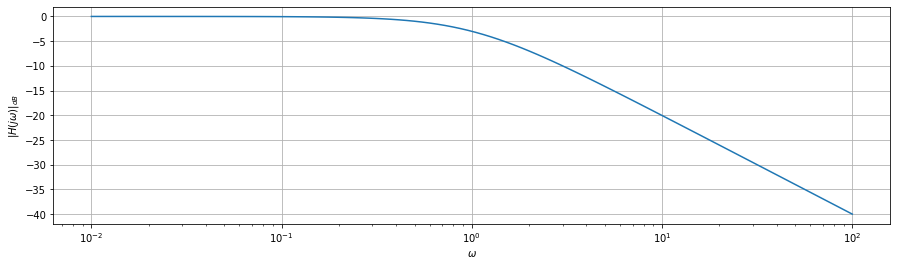

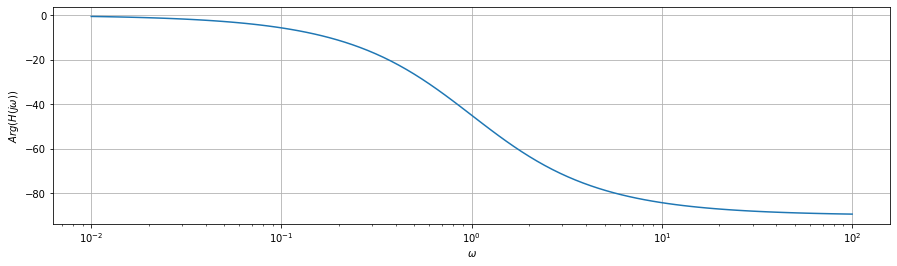

In [13]:
# Parametros de la transferencia de primer orden
a = 1
num = a
den = [1, a]

ww = np.logspace(-2.0, 2.0, num=100)

Ha = TransferFunction(num, den)
w, mag, fase = Ha.bode(ww)

# Graficas:
# Módulo
plt.figure(figsize=(15,4))
plt.semilogx(w, mag)
plt.grid()
plt.xlabel('$\omega$')
plt.ylabel('$|H(j\omega)|_{dB}$')
plt.show()
# Fase
plt.figure(figsize=(15,4))
plt.semilogx(w, fase)
plt.grid()
plt.xlabel('$\omega$')
plt.ylabel('$Arg(H(j\omega))$')
plt.show()

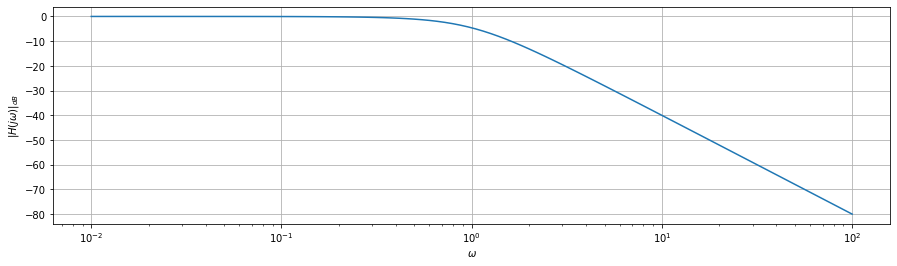

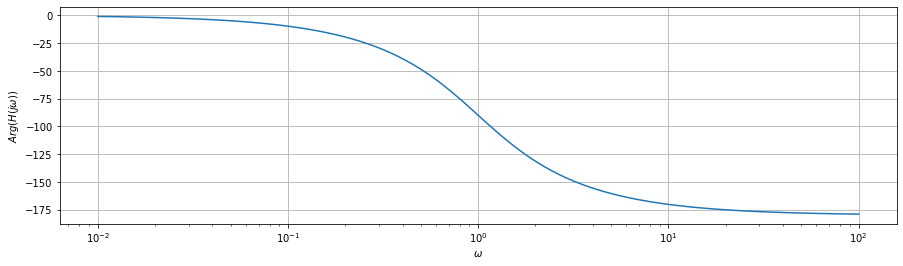

In [15]:
# Parametros de la transferencia de segundo orden
wn = 1
seda = 0.85
# seda = 0.01
num = wn*wn
den = [1, 2*seda*wn, wn*wn]

ww = np.logspace(-2.0, 2.0, num=100)

Ha = TransferFunction(num, den)
w, mag, fase = Ha.bode(ww)

# Graficas:
# Módulo
plt.figure(figsize=(15,4))
plt.semilogx(w, mag)
plt.grid()
plt.xlabel('$\omega$')
plt.ylabel('$|H(j\omega)|_{dB}$')
plt.show()
# Fase
plt.figure(figsize=(15,4))
plt.semilogx(w, fase)
plt.grid()
plt.xlabel('$\omega$')
plt.ylabel('$Arg(H(j\omega))$')
plt.show()

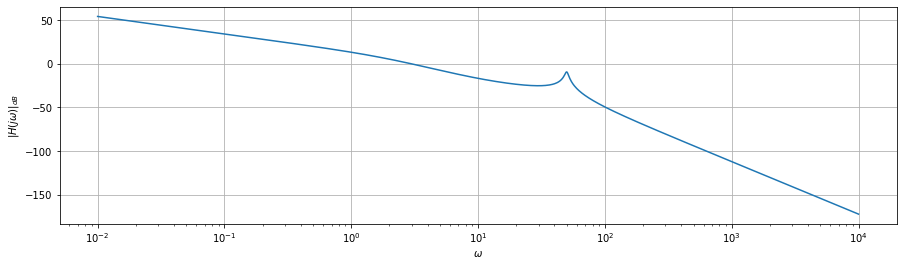

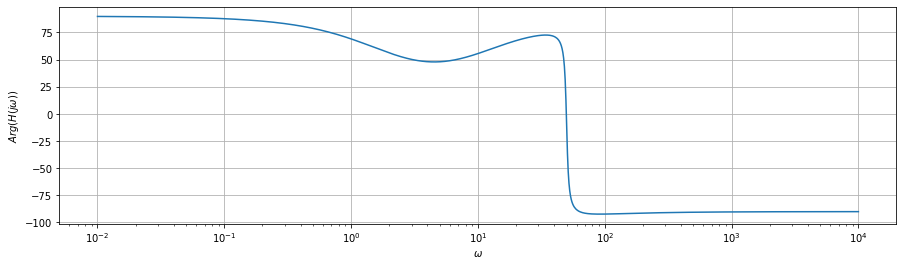

In [16]:
# Parametros de la transf. del ejercicio 3c
seda = 0.03
wn = 50

polos = [0, -2,
         -seda*wn+1j*wn*np.sqrt(1-seda**2), -seda*wn-1j*wn*np.sqrt(1-seda**2)]
ceros = [-10]
G = -50**2

# Definimos la transferencia
H3c = ZerosPolesGain(ceros, polos, G)

ww = np.logspace(-2.0, 4.0, num=1000)


# Hacer bode
w, mag, fase = H3c.bode(ww)

# Graficas:
# Módulo
plt.figure(figsize=(15,4))
plt.semilogx(w, mag)
plt.grid()
plt.xlabel('$\omega$')
plt.ylabel('$|H(j\omega)|_{dB}$')
plt.show()
# Fase
plt.figure(figsize=(15,4))
plt.semilogx(w, fase)
plt.grid()
plt.xlabel('$\omega$')
plt.ylabel('$Arg(H(j\omega))$')
plt.show()


<hr>

Otra forma de definir transferencias es con la función *TransferFunction* del mismo módulo [(link)](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.TransferFunction.html). A ésta hay que pasarle los coeficientes del numerador y denominador.

A modo de ejemplo, mostramos el ejercicio 3a).

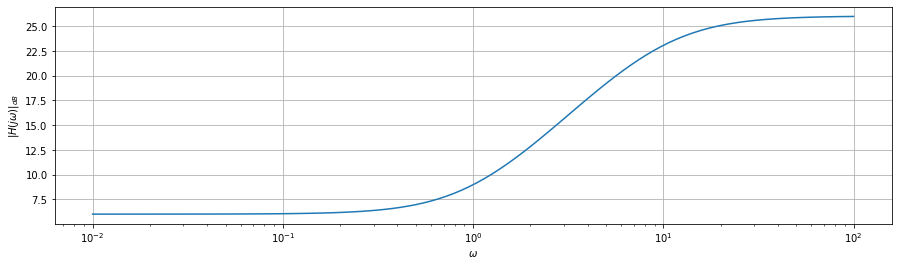

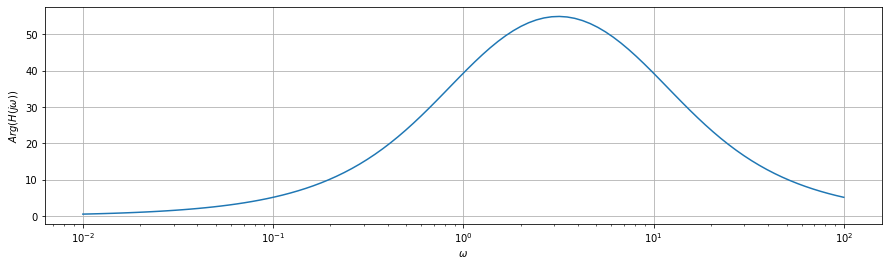

In [7]:
num = [2, 2]
den = [0.1, 1]

Ha = TransferFunction(num, den)
w, mag, fase = Ha.bode()

# Graficas:
# Módulo
plt.figure(figsize=(15,4))
plt.semilogx(w, mag)
plt.grid()
plt.xlabel('$\omega$')
plt.ylabel('$|H(j\omega)|_{dB}$')
plt.show()
# Fase
plt.figure(figsize=(15,4))
plt.semilogx(w, fase)
plt.grid()
plt.xlabel('$\omega$')
plt.ylabel('$Arg(H(j\omega))$')
plt.show()
